<center> <h1> Imports </h1> </center>

In [1]:
import warnings;
warnings.simplefilter('ignore');
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

<h3> Read CSV and show datatypes <h3>

In [4]:
data = pd.read_csv('apples.csv', delimiter=";")
data.dtypes

Unnamed: 0         int64
date              object
average_price    float64
total_volume       int64
gala               int64
fuji               int64
granny_smith       int64
total_bags         int64
s_bags             int64
l_bags             int64
xl_bags            int64
type              object
region            object
dtype: object

<h3> changing the date into the datetime format <h3>

In [5]:
data['date'] = pd.to_datetime(data['date'], infer_datetime_format=True)
data = data.drop(['Unnamed: 0'], axis = 1)
data.dtypes

date             datetime64[ns]
average_price           float64
total_volume              int64
gala                      int64
fuji                      int64
granny_smith              int64
total_bags                int64
s_bags                    int64
l_bags                    int64
xl_bags                   int64
type                     object
region                   object
dtype: object

 <center> <h1> Cleaning Data </h1> <center>

<h3> Defining dates <h3>

In [6]:
#data["year"] = data["date"].dt.year
#data["month"] = data["date"].dt.month
#data["week"] = data["date"].dt.isocalendar().week
#data["day"] = data["date"].dt.day
data["date"] = data["date"].apply(lambda x: x.toordinal())

<h3> Excluding regions that are overlapping eachother <h3>

In [7]:
data_to_use = data.where(data['region'] == 'TotalUS')
data_to_use = data_to_use.dropna()
data_to_use

,date,average_price,total_volume,gala,fuji,granny_smith,total_bags,s_bags,l_bags,xl_bags,type,region
2652,735959.0,0.95,2.729798e+09,962690109.0,1.019789e+09,118434009.0,628885244.0,485040409.0,125262631.0,18582204.0,conventional,TotalUS
2653,735952.0,0.98,2.508365e+09,871002176.0,9.329862e+08,120102001.0,584274355.0,461838966.0,102504877.0,19930512.0,conventional,TotalUS
2654,735945.0,0.93,2.804134e+09,985505366.0,1.080584e+09,101616317.0,636427964.0,496446213.0,137144028.0,2837723.0,conventional,TotalUS
2655,735938.0,0.89,2.880040e+09,940546436.0,1.216084e+09,93183063.0,630226296.0,500507736.0,123395621.0,6322939.0,conventional,TotalUS
2656,735931.0,0.99,2.261800e+09,809480356.0,9.003178e+08,73100841.0,478900900.0,390195304.0,85656034.0,3049562.0,conventional,TotalUS
...,...,...,...,...,...,...,...,...,...,...,...,...
18220,736729.0,1.53,1.384435e+08,11792252.0,2.877246e+07,170352.0,97708484.0,77469574.0,20187869.0,51041.0,organic,TotalUS
18221,736722.0,1.61,1.336827e+08,11861617.0,2.800803e+07,127061.0,93685949.0,79610427.0,14065284.0,10238.0,organic,TotalUS
18222,736715.0,1.63,1.283777e+08,10870528.0,2.591721e+07,149002.0,91440926.0,71065440.0,20352659.0,22827.0,organic,TotalUS
18223,736708.0,1.59,1.476524e+08,14568062.0,3.236698e+07,158001.0,100559378.0,85877269.0,14680897.0,1212.0,organic,TotalUS


In [8]:
data_to_use.drop('region', axis=1, inplace=True)

In [9]:
data_to_use = data_to_use.sort_values(by='date')


In [10]:
data_to_use['type']=data_to_use['type'].astype('category')
data_to_use['type_new']=data_to_use['type'].cat.codes

data_to_use= data_to_use.drop('type',axis=1)

In [11]:
data_to_use

,date,average_price,total_volume,gala,fuji,granny_smith,total_bags,s_bags,l_bags,xl_bags,type_new
2703,735602.0,0.95,3.132428e+09,1.235716e+09,1.362408e+09,84409332.0,4.498940e+08,3.585322e+08,89494563.0,1867281.0,0
11829,735602.0,1.46,6.129102e+07,2.332861e+07,2.166112e+07,437099.0,1.586418e+07,1.150687e+07,4357312.0,0.0,1
2702,735609.0,1.01,2.906354e+09,1.154481e+09,1.213477e+09,86657466.0,4.517384e+08,3.783261e+08,71833387.0,1578915.0,0
11828,735609.0,1.42,6.695289e+07,2.709667e+07,2.609716e+07,383042.0,1.337601e+07,1.068445e+07,2691563.0,0.0,1
2701,735616.0,1.03,2.904346e+09,1.185814e+09,1.170195e+09,83130190.0,4.652070e+08,3.873041e+08,77109320.0,793535.0,0
...,...,...,...,...,...,...,...,...,...,...,...
18215,736764.0,1.52,1.663957e+08,1.291697e+07,4.087635e+07,140187.0,1.124622e+08,9.445725e+07,18004900.0,0.0,1
18214,736771.0,1.54,1.675448e+08,1.708018e+07,4.449497e+07,104538.0,1.058652e+08,8.373518e+07,22112946.0,17019.0,1
9091,736771.0,1.05,4.138631e+09,1.370739e+09,1.106105e+09,64538085.0,1.597249e+09,1.171281e+09,398810174.0,27158314.0,0
9090,736778.0,1.03,4.340984e+09,1.413080e+09,1.212571e+09,75880112.0,1.639452e+09,1.254033e+09,354472939.0,30946753.0,0


In [12]:
_deepnote_run_altair(data_to_use, """{"data":{"name":"placeholder"},"mark":{"type":"bar","tooltip":true},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"quantitative","field":"date","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"average_price","scale":{"type":"linear","zero":true}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

In [13]:
data_to_useY = data_to_use['average_price']
data_to_useY.head()

2703     0.95
11829    1.46
2702     1.01
11828    1.42
2701     1.03
Name: average_price, dtype: float64

In [14]:
data_to_useX = data_to_use.drop('average_price',axis=1)
data_to_useX.head()

,date,total_volume,gala,fuji,granny_smith,total_bags,s_bags,l_bags,xl_bags,type_new
2703,735602.0,3.132428e+09,1.235716e+09,1.362408e+09,84409332.0,449894002.0,358532158.0,89494563.0,1867281.0,0
11829,735602.0,6.129102e+07,2.332861e+07,2.166112e+07,437099.0,15864183.0,11506871.0,4357312.0,0.0,1
2702,735609.0,2.906354e+09,1.154481e+09,1.213477e+09,86657466.0,451738418.0,378326116.0,71833387.0,1578915.0,0
11828,735609.0,6.695289e+07,2.709667e+07,2.609716e+07,383042.0,13376012.0,10684449.0,2691563.0,0.0,1
2701,735616.0,2.904346e+09,1.185814e+09,1.170195e+09,83130190.0,465206981.0,387304126.0,77109320.0,793535.0,0


In [15]:
data_to_use.count

<bound method DataFrame.count of            date  average_price  total_volume          gala          fuji  \
2703   735602.0           0.95  3.132428e+09  1.235716e+09  1.362408e+09   
11829  735602.0           1.46  6.129102e+07  2.332861e+07  2.166112e+07   
2702   735609.0           1.01  2.906354e+09  1.154481e+09  1.213477e+09   
11828  735609.0           1.42  6.695289e+07  2.709667e+07  2.609716e+07   
2701   735616.0           1.03  2.904346e+09  1.185814e+09  1.170195e+09   
...         ...            ...           ...           ...           ...   
18215  736764.0           1.52  1.663957e+08  1.291697e+07  4.087635e+07   
18214  736771.0           1.54  1.675448e+08  1.708018e+07  4.449497e+07   
9091   736771.0           1.05  4.138631e+09  1.370739e+09  1.106105e+09   
9090   736778.0           1.03  4.340984e+09  1.413080e+09  1.212571e+09   
18213  736778.0           1.55  1.558792e+08  1.210079e+07  3.428531e+07   

       granny_smith    total_bags        s_bags       

In [16]:
train_X, test_X, train_Y, test_Y = train_test_split(data_to_useX, data_to_useY, test_size=0.2, shuffle=False)


In [17]:
test_X

,date,total_volume,gala,fuji,granny_smith,total_bags,s_bags,l_bags,xl_bags,type_new
17465,736547.0,1.059779e+08,1.125920e+07,2.360152e+07,155251.0,7.096193e+07,5.984798e+07,11113948.0,0.0,1
8340,736547.0,3.252992e+09,1.129258e+09,1.098831e+09,66531255.0,9.583714e+08,6.889926e+08,237626993.0,31751795.0,0
8339,736554.0,3.281725e+09,1.095270e+09,1.115431e+09,62496341.0,1.008528e+09,6.687662e+08,311888917.0,27872565.0,0
17464,736554.0,1.014526e+08,9.800724e+06,2.301061e+07,141421.0,6.849980e+07,6.125446e+07,7244902.0,440.0,1
8338,736561.0,2.991374e+09,1.050793e+09,8.837219e+08,58107435.0,9.987522e+08,6.837126e+08,291155448.0,23884136.0,0
...,...,...,...,...,...,...,...,...,...,...
18215,736764.0,1.663957e+08,1.291697e+07,4.087635e+07,140187.0,1.124622e+08,9.445725e+07,18004900.0,0.0,1
18214,736771.0,1.675448e+08,1.708018e+07,4.449497e+07,104538.0,1.058652e+08,8.373518e+07,22112946.0,17019.0,1
9091,736771.0,4.138631e+09,1.370739e+09,1.106105e+09,64538085.0,1.597249e+09,1.171281e+09,398810174.0,27158314.0,0
9090,736778.0,4.340984e+09,1.413080e+09,1.212571e+09,75880112.0,1.639452e+09,1.254033e+09,354472939.0,30946753.0,0


In [18]:
train_X = train_X.values
train_Y = train_Y.values


In [20]:
regression_tree = DecisionTreeRegressor(max_depth=10)
regression_tree.fit(train_X, train_Y)

DecisionTreeRegressor(max_depth=10)

In [21]:
prediction_result = regression_tree.predict(test_X)
prediction_result

array([1.78, 1.33, 1.33, 1.76, 1.57, 1.76, 1.76, 1.57, 1.57, 1.76, 1.57,
       1.76, 1.57, 1.69, 1.57, 1.76, 1.57, 1.76, 1.57, 1.76, 1.57, 1.76,
       1.76, 1.57, 1.33, 1.76, 1.76, 1.33, 1.76, 1.33, 1.76, 1.57, 1.76,
       1.57, 1.76, 1.33, 1.76, 1.33, 1.76, 1.33, 1.33, 1.76, 1.33, 1.76,
       1.33, 1.64, 1.64, 1.33, 1.76, 1.33, 1.64, 1.33, 1.33, 1.64, 1.33,
       1.76, 1.33, 1.64, 1.33, 1.64, 1.33, 1.64, 1.33, 1.64, 1.64, 1.33,
       1.33, 1.64])

In [22]:
test_X

,date,total_volume,gala,fuji,granny_smith,total_bags,s_bags,l_bags,xl_bags,type_new
17465,736547.0,1.059779e+08,1.125920e+07,2.360152e+07,155251.0,7.096193e+07,5.984798e+07,11113948.0,0.0,1
8340,736547.0,3.252992e+09,1.129258e+09,1.098831e+09,66531255.0,9.583714e+08,6.889926e+08,237626993.0,31751795.0,0
8339,736554.0,3.281725e+09,1.095270e+09,1.115431e+09,62496341.0,1.008528e+09,6.687662e+08,311888917.0,27872565.0,0
17464,736554.0,1.014526e+08,9.800724e+06,2.301061e+07,141421.0,6.849980e+07,6.125446e+07,7244902.0,440.0,1
8338,736561.0,2.991374e+09,1.050793e+09,8.837219e+08,58107435.0,9.987522e+08,6.837126e+08,291155448.0,23884136.0,0
...,...,...,...,...,...,...,...,...,...,...
18215,736764.0,1.663957e+08,1.291697e+07,4.087635e+07,140187.0,1.124622e+08,9.445725e+07,18004900.0,0.0,1
18214,736771.0,1.675448e+08,1.708018e+07,4.449497e+07,104538.0,1.058652e+08,8.373518e+07,22112946.0,17019.0,1
9091,736771.0,4.138631e+09,1.370739e+09,1.106105e+09,64538085.0,1.597249e+09,1.171281e+09,398810174.0,27158314.0,0
9090,736778.0,4.340984e+09,1.413080e+09,1.212571e+09,75880112.0,1.639452e+09,1.254033e+09,354472939.0,30946753.0,0


In [23]:
test_X["date"] = (test_X["date"]).astype(int)
test_X["date"] = test_X["date"].apply(lambda x: dt.fromordinal(x)).dt.strftime('%d-%m-%Y')

In [24]:
test_X['result'] = prediction_result

In [25]:
test_X

,date,total_volume,gala,fuji,granny_smith,total_bags,s_bags,l_bags,xl_bags,type_new,result
17465,06-08-2017,1.059779e+08,1.125920e+07,2.360152e+07,155251.0,7.096193e+07,5.984798e+07,11113948.0,0.0,1,1.78
8340,06-08-2017,3.252992e+09,1.129258e+09,1.098831e+09,66531255.0,9.583714e+08,6.889926e+08,237626993.0,31751795.0,0,1.33
8339,13-08-2017,3.281725e+09,1.095270e+09,1.115431e+09,62496341.0,1.008528e+09,6.687662e+08,311888917.0,27872565.0,0,1.33
17464,13-08-2017,1.014526e+08,9.800724e+06,2.301061e+07,141421.0,6.849980e+07,6.125446e+07,7244902.0,440.0,1,1.76
8338,20-08-2017,2.991374e+09,1.050793e+09,8.837219e+08,58107435.0,9.987522e+08,6.837126e+08,291155448.0,23884136.0,0,1.57
...,...,...,...,...,...,...,...,...,...,...,...
18215,11-03-2018,1.663957e+08,1.291697e+07,4.087635e+07,140187.0,1.124622e+08,9.445725e+07,18004900.0,0.0,1,1.64
18214,18-03-2018,1.675448e+08,1.708018e+07,4.449497e+07,104538.0,1.058652e+08,8.373518e+07,22112946.0,17019.0,1,1.64
9091,18-03-2018,4.138631e+09,1.370739e+09,1.106105e+09,64538085.0,1.597249e+09,1.171281e+09,398810174.0,27158314.0,0,1.33
9090,25-03-2018,4.340984e+09,1.413080e+09,1.212571e+09,75880112.0,1.639452e+09,1.254033e+09,354472939.0,30946753.0,0,1.33


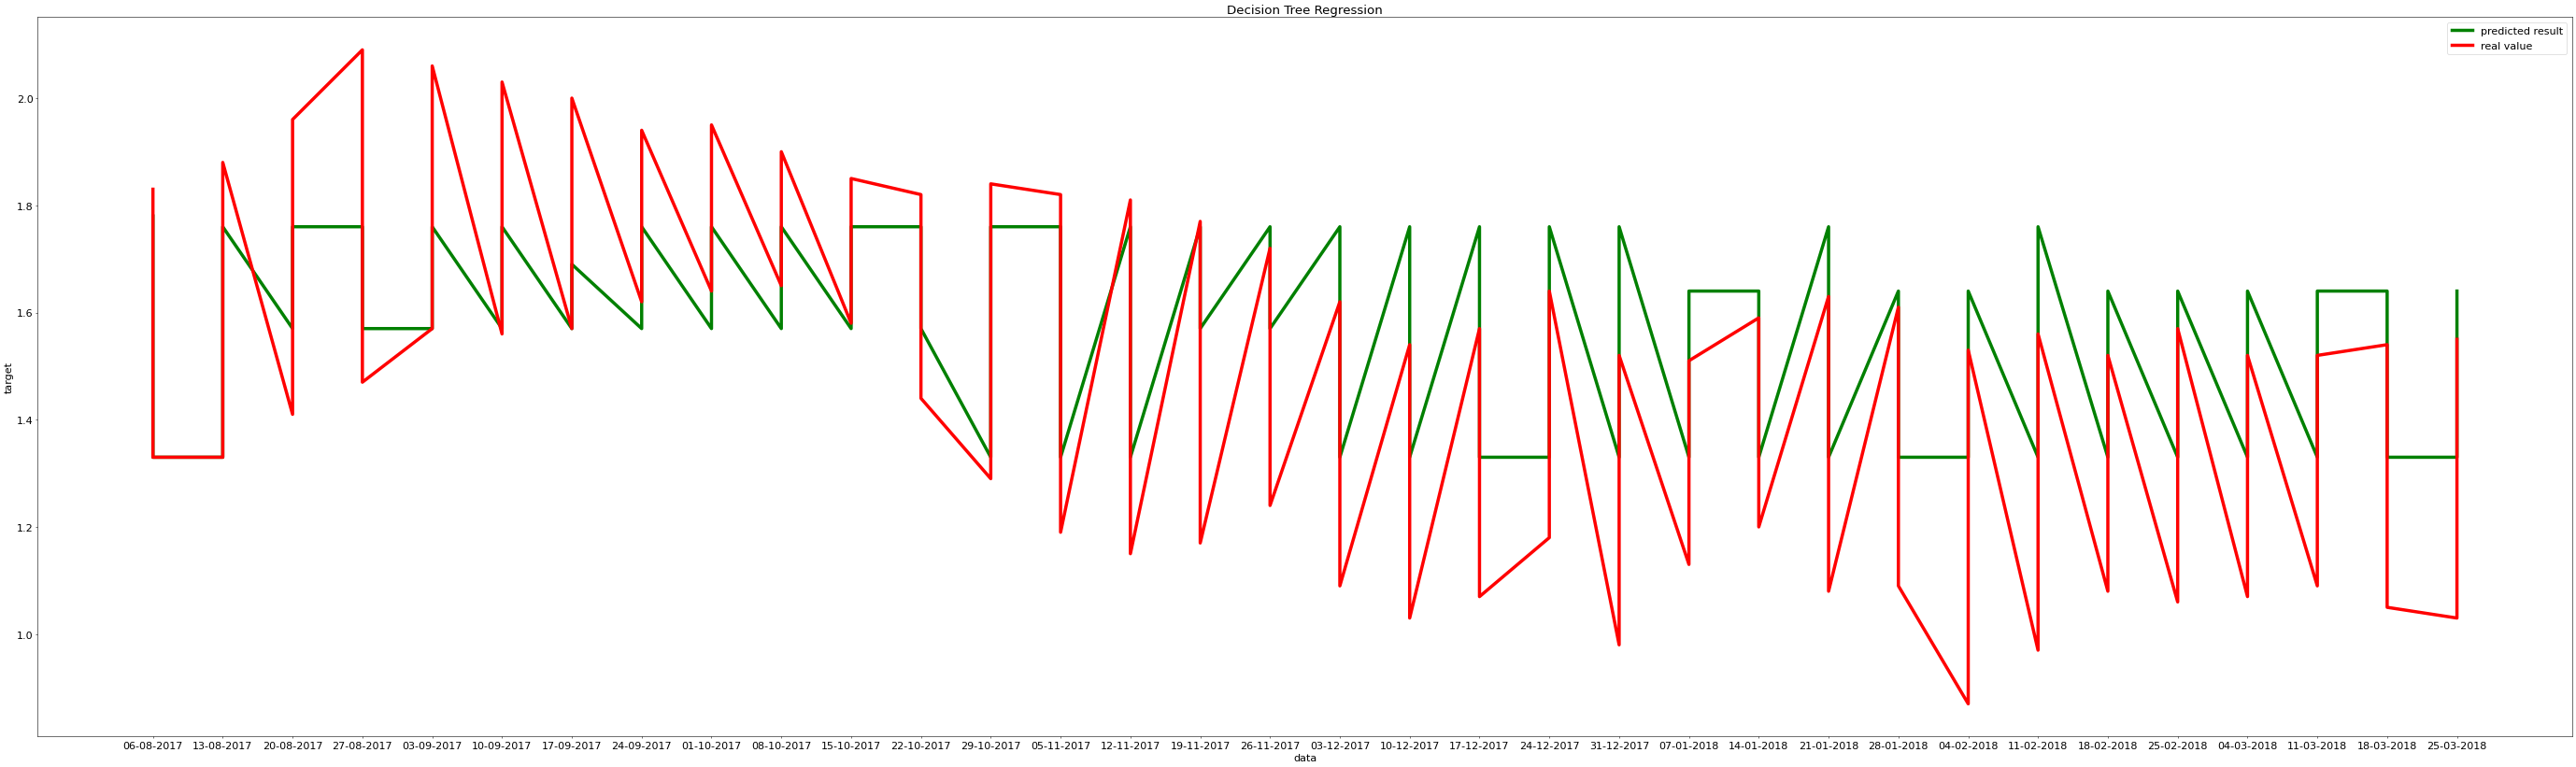

In [26]:
plt.rcParams["figure.figsize"] = (70,20)
plt.rcParams["figure.dpi"] = 50
plt.rcParams.update({'font.size': 16})

plt.figure()
plt.plot(test_X['date'],test_X['result'], color = 'green',  linewidth=5, label= 'predicted result')
waaaa = test_X.copy()
waaaa['res'] = test_Y

plt.plot(waaaa['date'],waaaa['res'], color = 'red' ,linewidth=5, label= 'real value')
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

ValueError: continuous is not supported

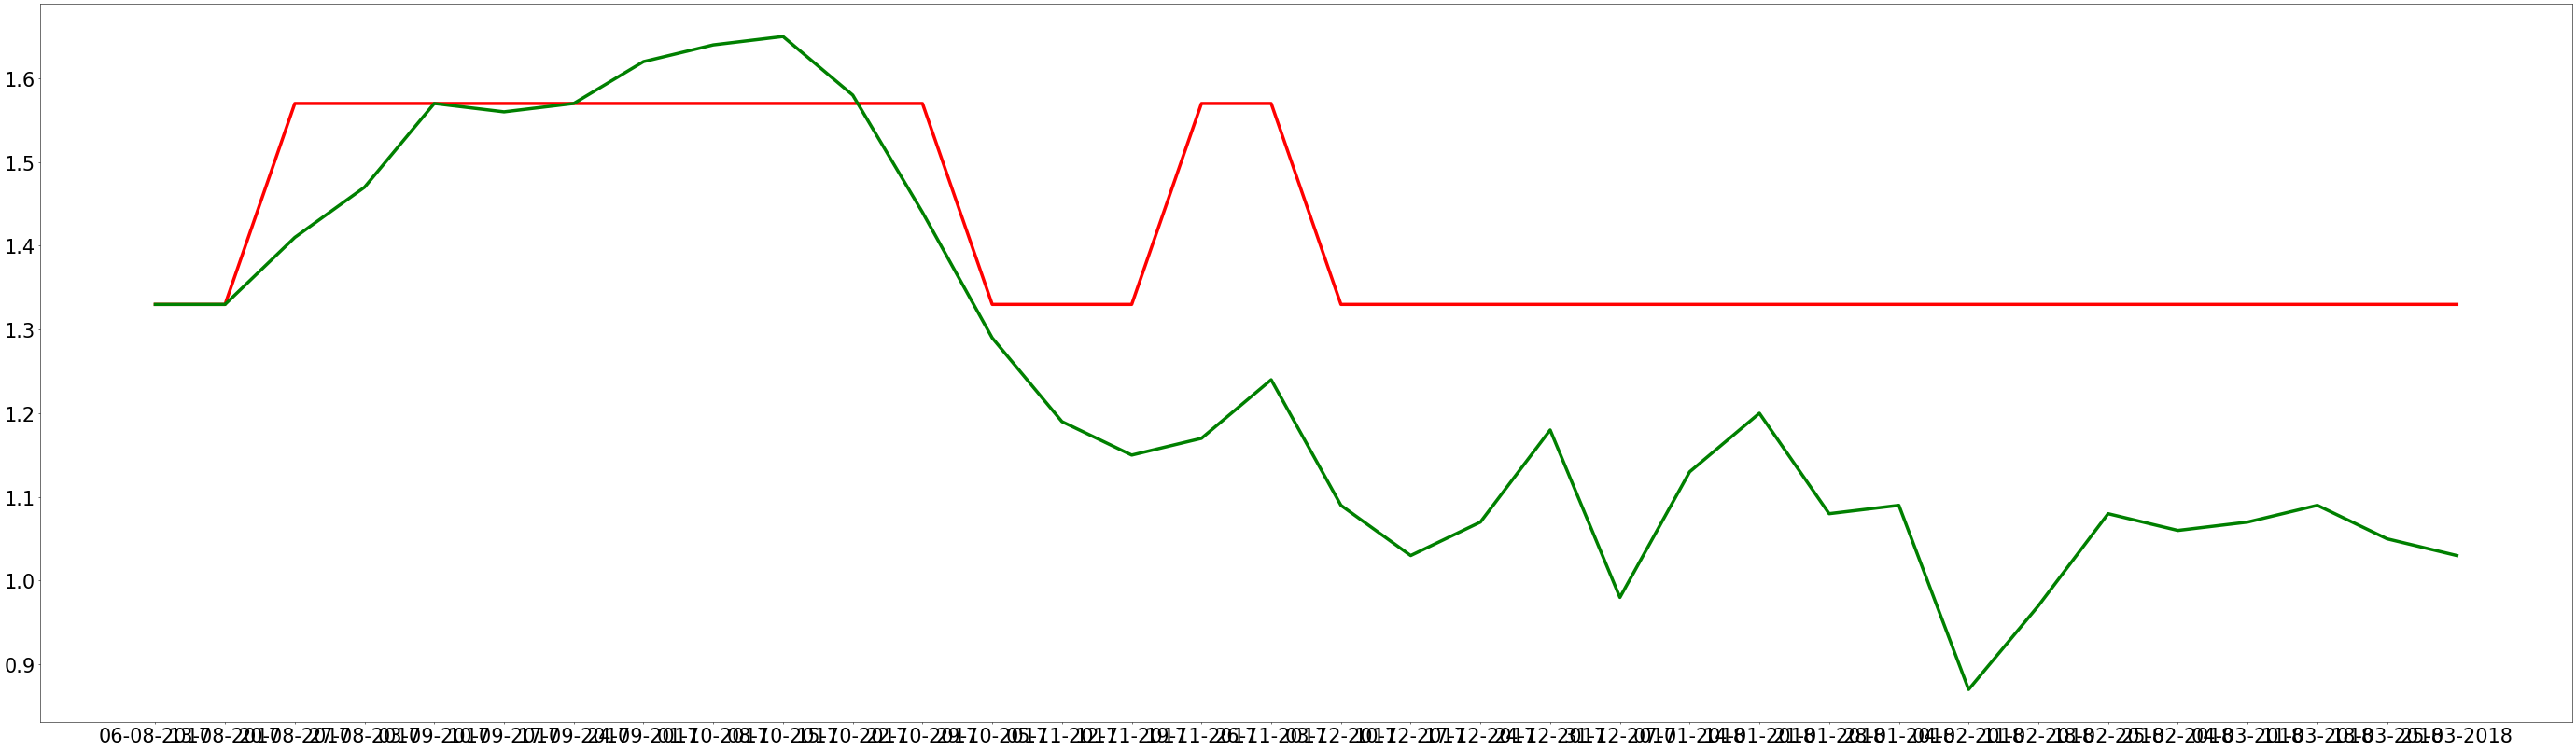

In [27]:
plt.rcParams["figure.figsize"] = (70,20)
plt.rcParams["figure.dpi"] = 50
plt.rcParams.update({'font.size': 30})
weee = waaaa.where(waaaa['type_new'] == 0)
weee = weee.dropna()
weee
plt.plot(weee['date'],weee['result'], color = 'red',linewidth=5)
plt.plot(weee['date'],weee['res'],color = 'green',linewidth=5)
score = accuracy_score(weee['res'], weee['result'])
print(score)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=55c8e725-4253-43b8-b391-9a95721ab1eb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>